✅Data Overview

Data Description:

PassengerId: Unique identifier for each passenger.

Survived: Survival indicator (0 = No, 1 = Yes).

Pclass: Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd).

Name: Passenger's name.

Sex: Gender of the passenger.

Age: Age of the passenger.

SibSp: Number of siblings/spouses aboard.

Parch: Number of parents/children aboard.

Ticket: Ticket number.

Fare: Passenger fare.

Cabin: Cabin number.

Embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

#Install

In [1]:
!pip install pandas-profiling

In [2]:
!pip install pydantic-settings

#Import librarys

In [30]:

import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# Data Info

In [4]:
data= pd.read_csv('tested.csv')

In [5]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [7]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [8]:
data.nunique()

,0
PassengerId,418
Survived,2
Pclass,3
Name,418
Sex,2
Age,79
SibSp,7
Parch,8
Ticket,363
Fare,169


# Missing Data

In [9]:
# Number of missing values in each column
print(data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [10]:
# fill the missing values with a placeholder (e.g., 'Unknown')
data['Cabin'].fillna('Unknown', inplace=True)


In [11]:
# Fill missing values in the 'Age' column with the median
data['Age'].fillna(data['Age'].median(), inplace=True)

In [12]:
# Fill missing values in the 'Age' column with the mean
data['Fare'].fillna(data['Fare'].mean(), inplace=True)

In [13]:
# Number of missing values in each column
print(data.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [14]:
data[data['Survived']==1][0:5]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,Unknown,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,Unknown,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,Unknown,Q
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,Unknown,C
12,904,1,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.0,1,0,21228,82.2667,B45,S


In [15]:
print((data['Survived']==1).sum())
print((data['Survived']==0).sum())

152
266


In [16]:
survived = data[data['Survived']==1]


In [17]:
survived.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,Unknown,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,Unknown,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,Unknown,Q
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,Unknown,C
12,904,1,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.0,1,0,21228,82.2667,B45,S


In [18]:
perished = data[data['Survived']==0]


In [19]:
survived['Pclass'].value_counts()


,count
Pclass,
3,72
1,50
2,30


#summary statistics

In [62]:

# Assuming your dataset is loaded in 'data'
summary_stats = data.describe(include='all')
print(summary_stats)

        PassengerId    Survived      Pclass              Name   Sex  \
count    418.000000  418.000000  418.000000               418   418   
unique          NaN         NaN         NaN               418     2   
top             NaN         NaN         NaN  Kelly, Mr. James  male   
freq            NaN         NaN         NaN                 1   266   
mean    1100.500000    0.363636    2.265550               NaN   NaN   
std      120.810458    0.481622    0.841838               NaN   NaN   
min      892.000000    0.000000    1.000000               NaN   NaN   
25%      996.250000    0.000000    1.000000               NaN   NaN   
50%     1100.500000    0.000000    3.000000               NaN   NaN   
75%     1204.750000    1.000000    3.000000               NaN   NaN   
max     1309.000000    1.000000    3.000000               NaN   NaN   

               Age       SibSp       Parch    Ticket        Fare    Cabin  \
count   418.000000  418.000000  418.000000       418  418.000000      

In [63]:
# Overall survival rate
total_passengers = data['PassengerId'].count()
total_survived = data['Survived'].sum()
overall_survival_rate = total_survived / total_passengers

print(f"Overall Survival Rate: {overall_survival_rate:.2%}")


Overall Survival Rate: 36.36%


In [64]:
# Survival Rate by Gender
survival_by_gender = data.groupby('Sex')['Survived'].mean()
print(f"Survival Rate by Gender:\n{survival_by_gender}")


Survival Rate by Gender:
Sex
female    1.0
male      0.0
Name: Survived, dtype: float64


In [65]:
#survival_by_pclass = data.groupby('Pclass')['Survived'].mean()

survival_by_pclass = data.groupby('Pclass')['Survived'].mean()
print(f"Survival Rate by Passenger Class:\n{survival_by_pclass}")


Survival Rate by Passenger Class:
Pclass
1    0.467290
2    0.322581
3    0.330275
Name: Survived, dtype: float64


In [68]:
# Age statistics
age_stats = data['Age'].describe()
print(f"Age Statistics:\n{age_stats}")



Age Statistics:
count    418.000000
mean      29.599282
std       12.703770
min        0.170000
25%       23.000000
50%       27.000000
75%       35.750000
max       76.000000
Name: Age, dtype: float64


In [67]:
# Creating age groups for more insights
data['AgeGroup'] = pd.cut(data['Age'], bins=[0, 12, 18, 30, 50, 100], labels=['Child', 'Teenager', 'Young Adult', 'Adult', 'Senior'])
age_group_stats = data.groupby('AgeGroup')['Survived'].mean()
print(f"Survival Rate by Age Group:\n{age_group_stats}")

Survival Rate by Age Group:
AgeGroup
Child          0.480000
Teenager       0.413793
Young Adult    0.336207
Adult          0.346535
Senior         0.483871
Name: Survived, dtype: float64


<ipython-input-67-6429bbee5d50>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_stats = data.groupby('AgeGroup')['Survived'].mean()


In [69]:
# Fare statistics
fare_stats = data['Fare'].describe()
print(f"Fare Statistics:\n{fare_stats}")


Fare Statistics:
count    418.000000
mean      35.627188
std       55.840500
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: Fare, dtype: float64


In [70]:
# Fare distribution by class
fare_by_pclass = data.groupby('Pclass')['Fare'].describe()
print(f"Fare Distribution by Passenger Class:\n{fare_by_pclass}")

Fare Distribution by Passenger Class:
        count       mean        std     min    25%      50%        75%  \
Pclass                                                                   
1       107.0  94.280297  84.435858  0.0000  30.10  60.0000  134.50000   
2        93.0  22.202104  13.991877  9.6875  13.00  15.7500   26.00000   
3       218.0  12.565951  10.892386  3.1708   7.75   7.8958   14.44065   

             max  
Pclass            
1       512.3292  
2        73.5000  
3        69.5500  


In [71]:
# Distribution of passengers by embarkation point
embarked_distribution = data['Embarked'].value_counts(normalize=True)
print(f"Distribution of Passengers by Embarkation Point:\n{embarked_distribution}")


Distribution of Passengers by Embarkation Point:
Embarked
S    0.645933
C    0.244019
Q    0.110048
Name: proportion, dtype: float64


In [72]:
# Correlation matrix
correlation_matrix = data[['Age', 'Fare', 'SibSp', 'Parch', 'Survived']].corr()
print(f"Correlation Matrix:\n{correlation_matrix}")


Correlation Matrix:
               Age      Fare     SibSp     Parch  Survived
Age       1.000000  0.344627 -0.071197 -0.043731  0.008035
Fare      0.344627  1.000000  0.171488  0.230001  0.191382
SibSp    -0.071197  0.171488  1.000000  0.306895  0.099943
Parch    -0.043731  0.230001  0.306895  1.000000  0.159120
Survived  0.008035  0.191382  0.099943  0.159120  1.000000


In [74]:
# Pivot table of survival counts by Pclass and Gender
survival_pivot = data.pivot_table(index='Pclass', columns='Sex', values='Survived', aggfunc='sum')
print(f"Survival Count by Pclass and Gender:\n{survival_pivot}")


Survival Count by Pclass and Gender:
Sex     female  male
Pclass              
1           50     0
2           30     0
3           72     0


# Data Visualization

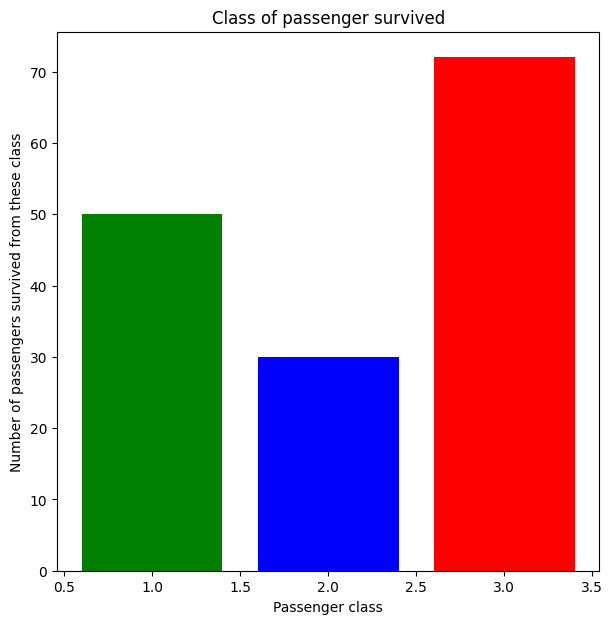

In [20]:
  # Create a bar chart showing the number of survivors in each passenger class
plt.figure(figsize=(7,7))
plt.xlabel("Passenger class")
plt.ylabel("Number of passengers survived from these class")
plt.title("Class of passenger survived")
plt.bar(survived['Pclass'].value_counts().keys(),survived['Pclass'].value_counts().values, color=['red','green','blue'])
plt.show()

In [21]:
data['AgeGrp'] = pd.cut(data['Age'], bins=[-np.inf,17, 39, 59, np.inf], labels=["Children","Youth","MiddleAged","SeniorCitizens"])

In [22]:
data['AgeGrp'].value_counts()


,count
AgeGrp,
Youth,295
MiddleAged,68
Children,41
SeniorCitizens,14


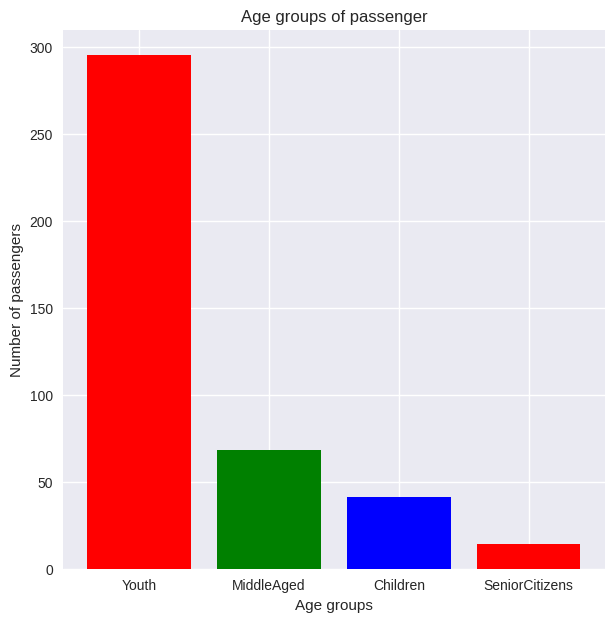

In [34]:
# Create a bar chart showing the number of passengers in each age group
plt.figure(figsize=(7,7))
plt.xlabel("Age groups")
plt.ylabel("Number of passengers")
plt.title("Age groups of passenger")
plt.bar(data['AgeGrp'].value_counts().keys(),data['AgeGrp'].value_counts().values, color=['red','green','blue'])
plt.show()

In [24]:
 survived['AgeGrp'] = pd.cut(survived['Age'], bins=[-np.inf,17, 39, 59, np.inf], labels=["Children","Youth","MiddleAged","SeniorCitizens"])

<ipython-input-24-279666811c66>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survived['AgeGrp'] = pd.cut(survived['Age'], bins=[-np.inf,17, 39, 59, np.inf], labels=["Children","Youth","MiddleAged","SeniorCitizens"])


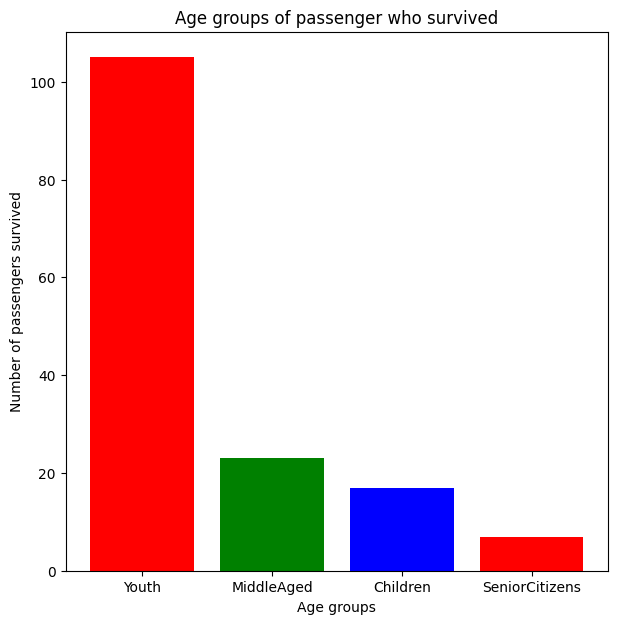

In [25]:
 # Create a bar chart showing the number of survivors in each age group
plt.figure(figsize=(7,7))
plt.xlabel("Age groups")
plt.ylabel("Number of passengers survived")
plt.title("Age groups of passenger who survived")
plt.bar(survived['AgeGrp'].value_counts().keys(),survived['AgeGrp'].value_counts().values, color=['red','green','blue'])
plt.show()

In [26]:
perished['AgeGrp'] = pd.cut(perished['Age'], bins=[-np.inf,17, 39, 59, np.inf], labels=["Children","Youth","MiddleAged","SeniorCitizens"])

<ipython-input-26-04007432a65f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  perished['AgeGrp'] = pd.cut(perished['Age'], bins=[-np.inf,17, 39, 59, np.inf], labels=["Children","Youth","MiddleAged","SeniorCitizens"])


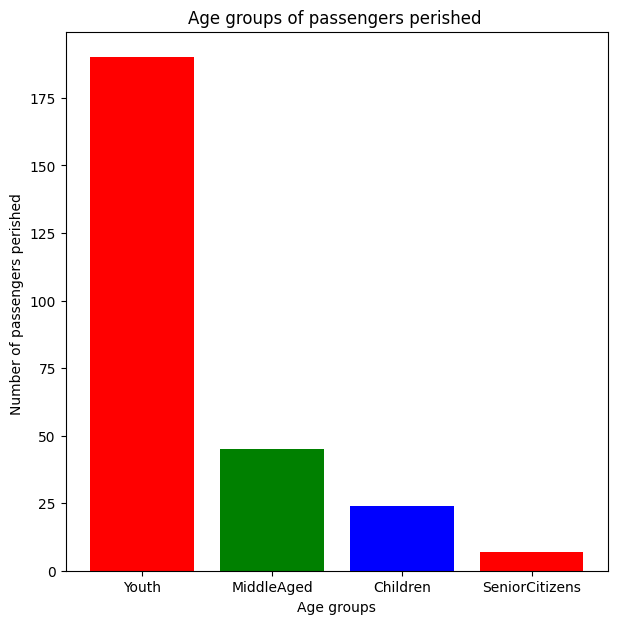

In [27]:
# Create a bar chart showing the number of passengers who perished in each age group
plt.figure(figsize=(7,7))
plt.xlabel("Age groups")
plt.ylabel("Number of passengers perished ")
plt.title("Age groups of passengers perished ")
plt.bar(perished['AgeGrp'].value_counts().keys(),perished['AgeGrp'].value_counts().values, color=['red','green','blue'])
plt.show()

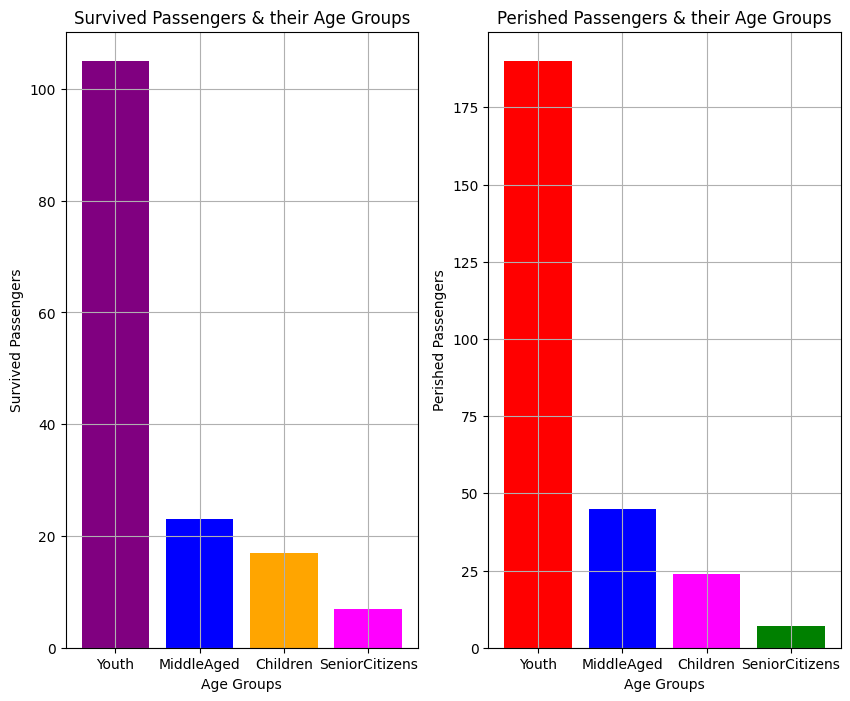

In [28]:
 # Create two subplots side by side comparing age group distributions of survived and perished passengers
plt.figure(figsize=(10,8))
plt.subplot(1, 2, 1)
plt.xlabel('Age Groups')
plt.ylabel('Survived Passengers')
plt.title('Survived Passengers & their Age Groups')
plt.grid()
plt.bar(survived['AgeGrp'].value_counts().keys(),survived['AgeGrp'].value_counts(),color=['purple','blue','orange','magenta'])
plt.subplot(1, 2, 2)
plt.xlabel('Age Groups')
plt.ylabel('Perished Passengers')
plt.title('Perished Passengers & their Age Groups')
plt.grid()
plt.bar(perished ['AgeGrp'].value_counts().keys(),perished['AgeGrp'].value_counts(),color=['red','blue','magenta','green'])
plt.show()

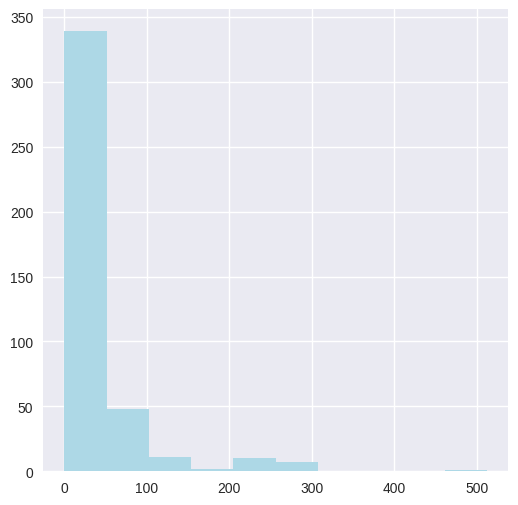

In [40]:
# Create a histogram to visualize the distribution of passenger fares
plt.figure(figsize=(6,6))
plt.hist(data['Fare'],color='lightblue',)
plt.show()

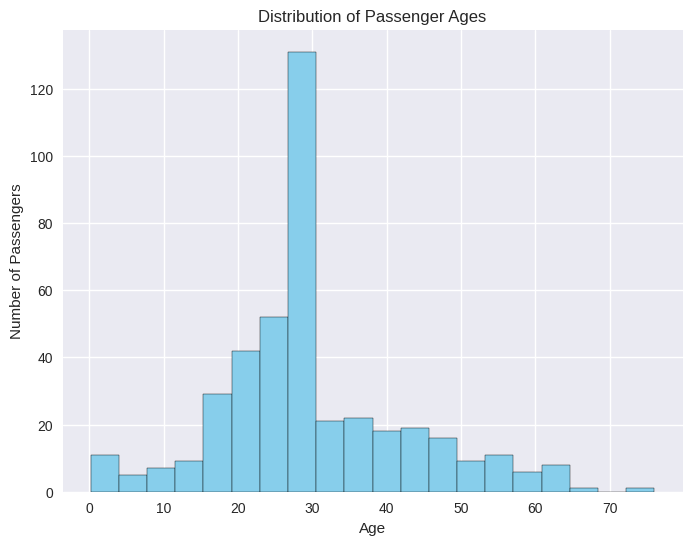

In [41]:
 # Histogram showing the distribution of passenger ages
plt.figure(figsize=(8,6))
plt.hist(data['Age'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.title('Distribution of Passenger Ages')
plt.show()


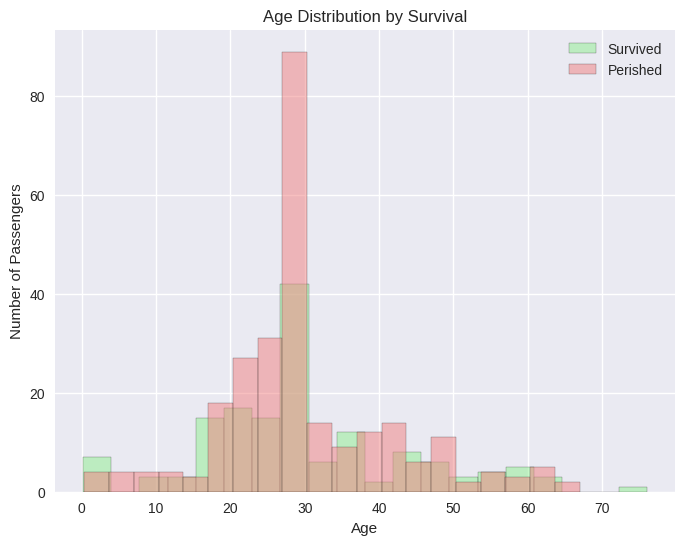

In [55]:
# Histogram comparing age distributions of survivors and perished passengers
plt.figure(figsize=(8,6))
survived['Age'].dropna().plot(kind='hist', alpha=0.5, color='lightgreen', bins=20, edgecolor='black', label='Survived')
perished['Age'].dropna().plot(kind='hist', alpha=0.5, color='lightcoral', bins=20, edgecolor='black', label='Perished')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.title('Age Distribution by Survival')
plt.legend()
plt.show()

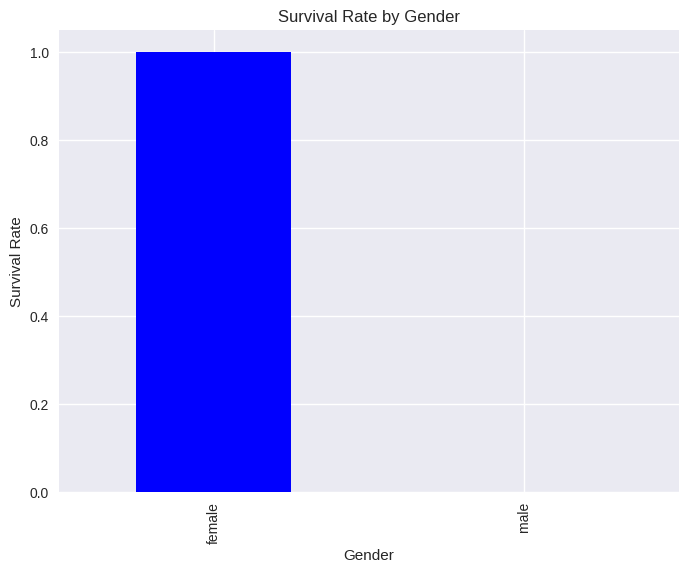

In [42]:
 # Bar chart of survival rates by gender
plt.figure(figsize=(8,6))
data.groupby('Sex')['Survived'].mean().plot(kind='bar', color=['blue', 'pink'])
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Gender')
plt.show()


<Figure size 1000x600 with 0 Axes>

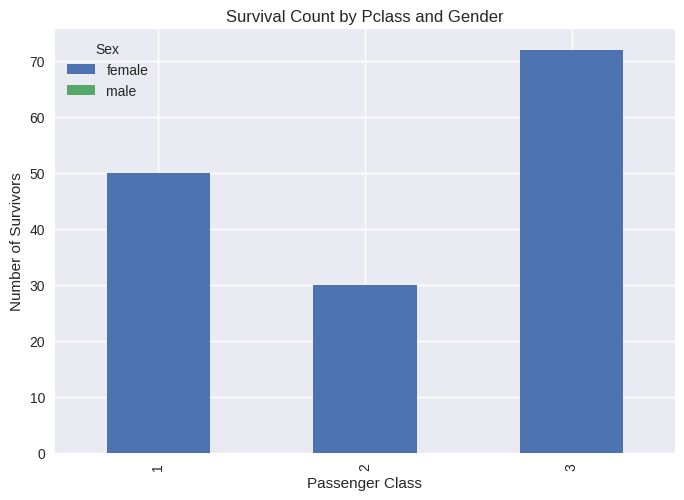

In [56]:
# Stacked bar chart of survival counts by passenger class and gender
plt.figure(figsize=(10,6))
survival_pivot = data.pivot_table(index='Pclass', columns='Sex', values='Survived', aggfunc='sum')
survival_pivot.plot(kind='bar', stacked=True)
plt.xlabel('Passenger Class')
plt.ylabel('Number of Survivors')
plt.title('Survival Count by Pclass and Gender')
plt.show()

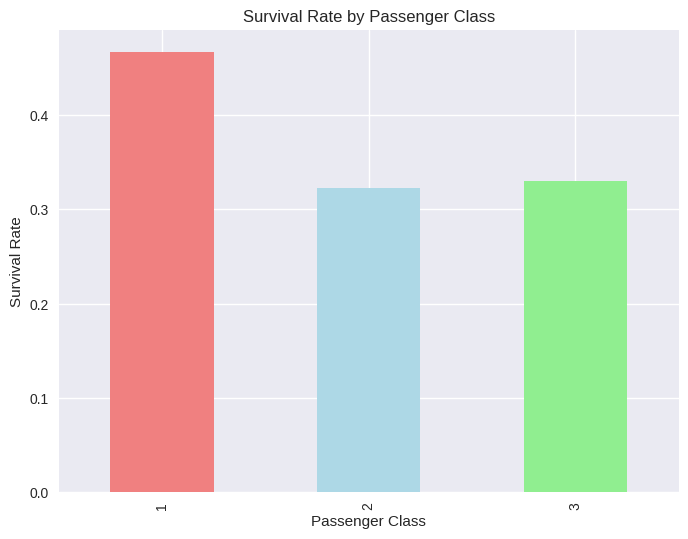

In [43]:
 # Bar chart of survival rates by passenger class
plt.figure(figsize=(8,6))
data.groupby('Pclass')['Survived'].mean().plot(kind='bar', color=['lightcoral', 'lightblue', 'lightgreen'])
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Passenger Class')
plt.show()


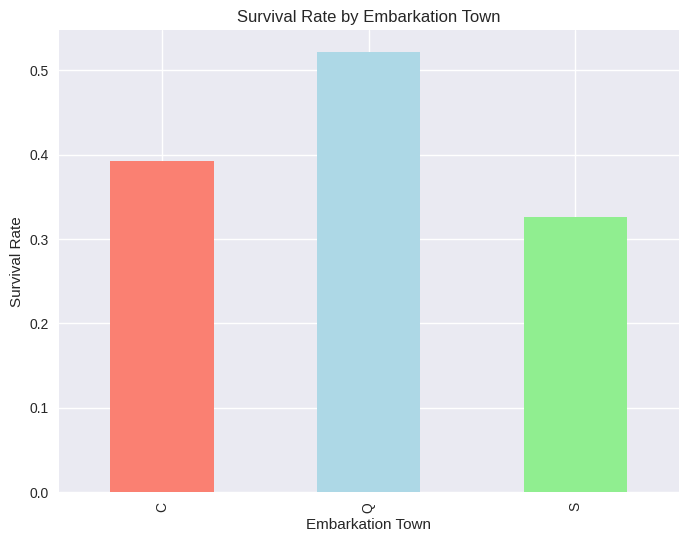

In [45]:
# Bar chart of survival rates by embarkation town
plt.figure(figsize=(8,6))
data.groupby('Embarked')['Survived'].mean().plot(kind='bar', color=['salmon', 'lightblue', 'lightgreen'])
plt.xlabel('Embarkation Town')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Embarkation Town')
plt.show()


<ipython-input-54-889f2651644f>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby('AgeGroup')['Survived'].mean().plot(kind='bar', color=['lightblue', 'lightgreen', 'lightcoral', 'lightyellow', 'lightgrey'])


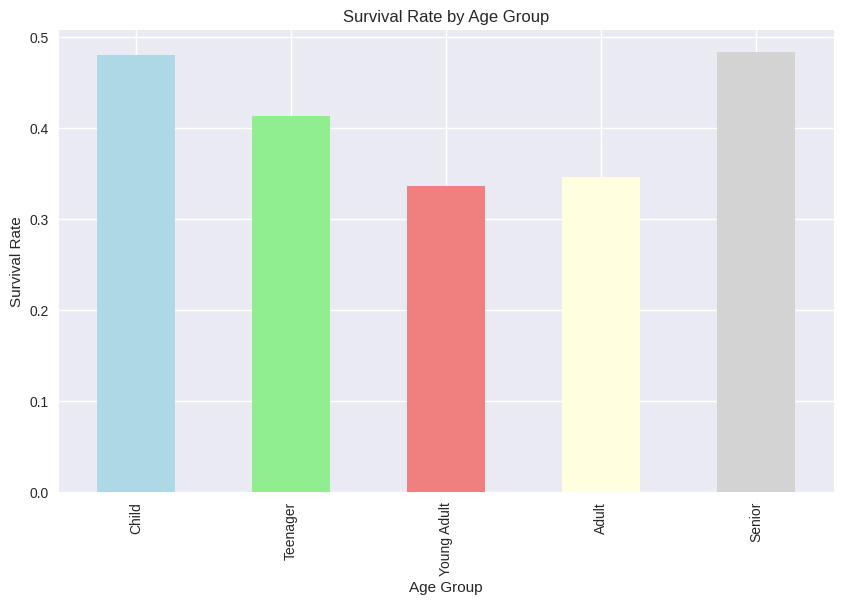

In [54]:
# Create age groups and plot survival rates by age group
data['AgeGroup'] = pd.cut(data['Age'], bins=[0, 12, 18, 30, 50, 100], labels=['Child', 'Teenager', 'Young Adult', 'Adult', 'Senior'])
plt.figure(figsize=(10,6))
data.groupby('AgeGroup')['Survived'].mean().plot(kind='bar', color=['lightblue', 'lightgreen', 'lightcoral', 'lightyellow', 'lightgrey'])
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Age Group')
plt.show()


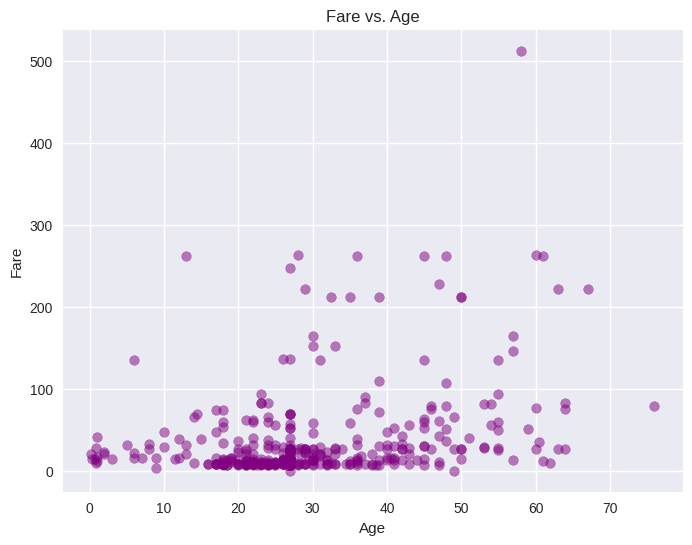

In [46]:
 # Scatter plot of fare versus age
plt.figure(figsize=(8,6))
plt.scatter(data['Age'], data['Fare'], alpha=0.5, color='purple')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Fare vs. Age')
plt.show()

<ipython-input-57-c90c1898ed3f>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


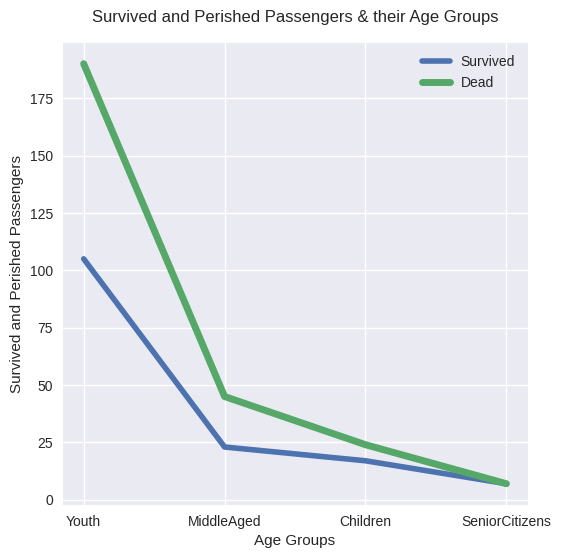

In [57]:
# Create a line plot comparing the number of survived and perished passengers across age groups
plt.style.use("seaborn")
plt.figure(figsize=(6,6))
plt.plot(survived['AgeGrp'].value_counts().keys(),survived['AgeGrp'].value_counts(), label="Survived", linewidth=4)
plt.plot(perished['AgeGrp'].value_counts().keys(),perished['AgeGrp'].value_counts(), label="Dead", linewidth=5)

plt.xlabel('Age Groups')
plt.ylabel('Survived and Perished Passengers')
plt.title("Survived and Perished Passengers & their Age Groups",pad=15)
plt.legend()
plt.show()

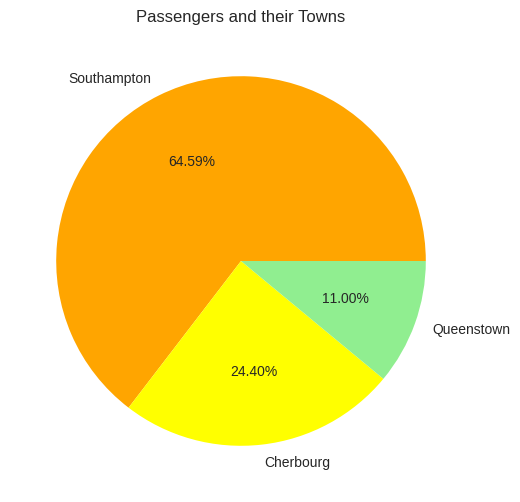

In [58]:
 # Create a pie chart showing the distribution of passengers by embarkation town
plt.figure(figsize=(6,6))
plt.title('Passengers and their Towns')
#shadow=True
plt.pie(data['Embarked'].value_counts(),labels=['Southampton','Cherbourg','Queenstown'], autopct ='%1.02f%%', colors=['orange','yellow','lightgreen'])
plt.show()

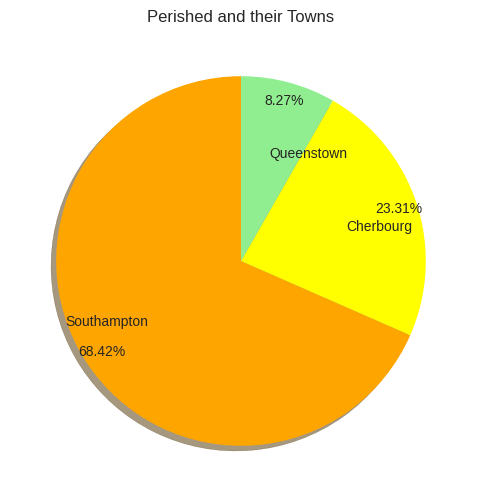

In [59]:
# Create a pie chart showing the distribution of perished passengers by embarkation town with enhanced visual effects
plt.figure(figsize=(6,6))
plt.title('Perished and their Towns')
#shadow=True
explode = (0, 0.1, 0)

plt.pie(perished['Embarked'].value_counts(),labels=['Southampton','Cherbourg','Queenstown'], autopct ='%1.02f%%', colors=['orange','yellow','lightgreen'],shadow=True,startangle=90,labeldistance=0.6, pctdistance=0.9)
plt.show()

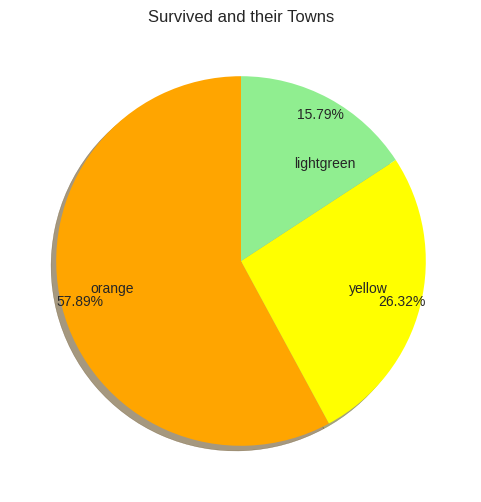

In [60]:
# Create a pie chart showing the distribution of survived passengers by embarkation town with visual enhancements
plt.figure(figsize=(6,6))
plt.title('Survived and their Towns')
#shadow=True
explode = (0, 0.1, 0)

plt.pie(survived['Embarked'].value_counts(),labels=['orange','yellow','lightgreen'], autopct ='%1.02f%%', colors=['orange','yellow','lightgreen'],shadow=True,startangle=90,labeldistance=0.6, pctdistance=0.9)
plt.show()

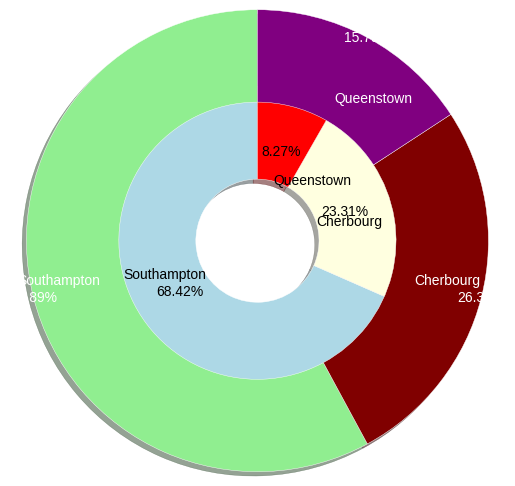

In [61]:
# Create a pie chart with two concentric rings to compare survived and perished passengers by embarkation town
plt.figure(figsize=(5,5))

#plt.subplots(figsize=(10,6), facecolor='purple')


plt.pie(perished['Embarked'].value_counts(),
       radius=1,
       colors=['lightblue','lightyellow','red'],
       labels=['Southampton','Cherbourg','Queenstown'],
       textprops={'color':'black'},
        startangle=90,
       wedgeprops=dict(width=0.6, edgecolor='w'),
        autopct ='%1.02f%%',
       #pctdistance=1.1,
        labeldistance=0.4,
        shadow=True)
plt.pie(survived['Embarked'].value_counts(),
       radius=1.5,
       colors=['lightgreen','maroon','purple'],
        textprops={'color':'white'},
        startangle=90,
       wedgeprops=dict(width=0.6, edgecolor='w'),
        labels=['Southampton','Cherbourg','Queenstown'],
        shadow=True, labeldistance=0.7,autopct ='%1.02f%%',pctdistance=1)
#plt.tight_layout()
plt.show()


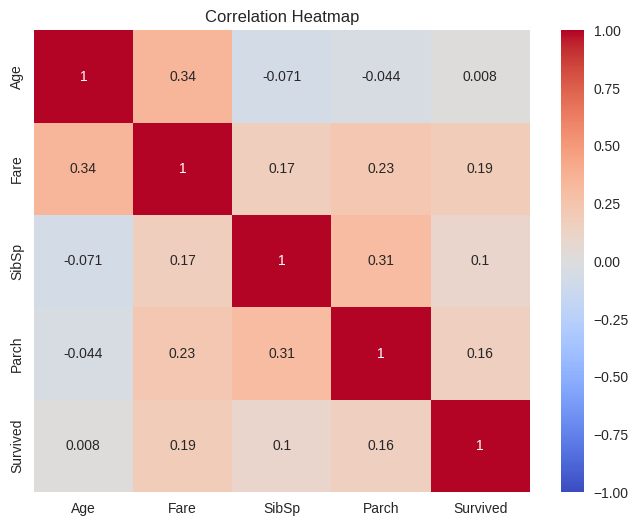

In [50]:
# Heatmap showing correlation between numerical features
plt.figure(figsize=(8,6))
sns.heatmap(data[['Age', 'Fare', 'SibSp', 'Parch', 'Survived']].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()